In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import tensorflow as tf
import MIDASpy as md
import math


In [2]:
column_names=['column 1','column 2','column 3','column 4','column 5','column 6','column 7','column 8','column 9','column 10','column 11','column 12','column 13','column 14','column 15','column 16','column 17','column 18','column 19','column 20','column 21','column 22','column 23','column 24','column 25','column 26','column 27','column 28','column 29','column 30','column 31','column 32','column 33','column 34',]
df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\incomplete\Incomplete Datasets Without Labels\DERM\DERM_NE_1.xlsx', header=None,names=column_names)
df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.0,1,1.0,1.0,0.0,0.0,0.0,2,2.0,...,0,0,0.0,0,0.0,0.0,0.0,0,2,0.0
1,1,1.0,2,0.0,0.0,0.0,3.0,0.0,3,0.0,...,0,0,0.0,0,0.0,2.0,2.0,2,0,7.0
2,2,2.0,1,0.0,0.0,0.0,3.0,0.0,2,0.0,...,0,0,0.0,2,0.0,3.0,3.0,2,0,7.0
3,2,2.0,2,1.0,0.0,0.0,2.0,0.0,2,2.0,...,0,0,0.0,2,0.0,2.0,2.0,2,0,7.0
4,2,2.0,1,0.0,0.0,0.0,2.0,0.0,2,0.0,...,0,0,0.0,3,0.0,2.0,2.0,2,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2.0,0,2.0,1.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,3,0.0,0.0,0.0,3,0,70.0
354,2,3.0,2,0.0,0.0,0.0,0.0,0.0,3,2.0,...,0,0,0.0,0,0.0,0.0,0.0,1,0,70.0
355,2,2.0,2,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,2,0.0,NaN,0.0,2,0,70.0
356,2,1.0,0,3.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.0,0.0,1,0,70.0


In [3]:
print('dataType',end='\t')
print('column_names',end='\t')
print('Number of Nulls')
for name in column_names:
    print(df[name].dtype,end='\t\t')
    print(name,end='\t')
    print(df[name].isnull().sum())

dataType	column_names	Number of Nulls
int64		column 1	0
float64		column 2	3
int64		column 3	0
float64		column 4	3
float64		column 5	3
float64		column 6	3
float64		column 7	9
float64		column 8	6
int64		column 9	0
float64		column 10	6
float64		column 11	6
float64		column 12	3
float64		column 13	9
float64		column 14	3
float64		column 15	9
int64		column 16	0
int64		column 17	0
int64		column 18	0
float64		column 19	3
float64		column 20	3
float64		column 21	3
float64		column 22	6
float64		column 23	3
int64		column 24	0
int64		column 25	0
int64		column 26	0
float64		column 27	3
int64		column 28	0
float64		column 29	3
float64		column 30	3
float64		column 31	3
int64		column 32	0
int64		column 33	0
float64		column 34	3


In [4]:
df.describe()

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
count,358.000000,355.000000,358.000000,355.000000,355.000000,355.000000,349.000000,352.000000,358.000000,352.000000,...,358.000000,358.000000,355.000000,358.000000,355.000000,355.000000,355.000000,358.000000,358.000000,355.000000
mean,2.078212,1.800000,1.569832,1.357746,0.633803,0.445070,0.169054,0.380682,0.622905,0.519886,...,0.399441,0.474860,0.459155,0.949721,0.453521,0.107042,0.118310,1.877095,0.558659,36.346479
std,0.664865,0.698667,0.900909,1.131928,0.908830,0.950288,0.574921,0.838851,0.990278,0.902451,...,0.856479,0.871705,0.959870,1.129060,0.953707,0.457000,0.495833,0.699324,1.107990,15.359568
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,25.000000
50%,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,35.000000
75%,2.750000,2.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,2.000000,0.000000,50.000000
max,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,75.000000


<AxesSubplot:>

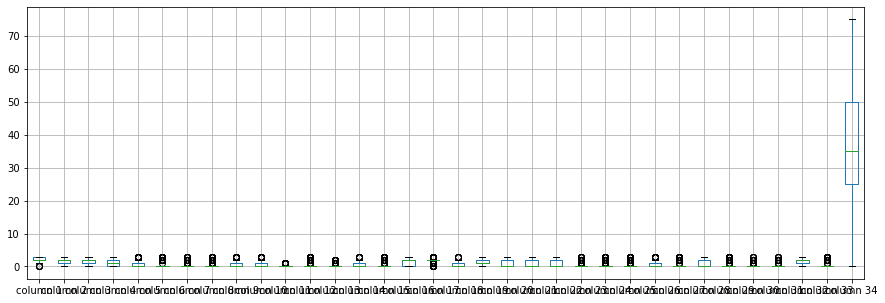

In [5]:
df.boxplot(return_type='axes', figsize=(15,5))

In [6]:
df.mean()

column 1      2.078212
column 2      1.800000
column 3      1.569832
column 4      1.357746
column 5      0.633803
column 6      0.445070
column 7      0.169054
column 8      0.380682
column 9      0.622905
column 10     0.519886
column 11     0.122159
column 12     0.414085
column 13     0.143266
column 14     0.543662
column 15     0.306590
column 16     1.368715
column 17     1.955307
column 18     0.511173
column 19     1.287324
column 20     0.653521
column 21     0.985915
column 22     0.653409
column 23     0.298592
column 24     0.368715
column 25     0.399441
column 26     0.474860
column 27     0.459155
column 28     0.949721
column 29     0.453521
column 30     0.107042
column 31     0.118310
column 32     1.877095
column 33     0.558659
column 34    36.346479
dtype: float64

In [7]:
corr=df.corr()
corr

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
column 1,1.000000,0.421285,0.248062,-0.038924,-0.004787,0.031176,-0.119256,-0.040224,0.138519,0.192898,...,-0.020583,0.153229,-0.003775,0.038837,-0.025444,-0.009291,0.006893,0.093026,-0.013850,-0.005658
column 2,0.421285,1.000000,0.341080,-0.076386,-0.008602,-0.074960,-0.102057,-0.079971,0.294671,0.308485,...,-0.087550,0.212730,-0.105910,0.032190,-0.121305,-0.010909,-0.013468,-0.011558,-0.134007,0.020246
column 3,0.248062,0.341080,1.000000,-0.054153,0.242002,0.324089,-0.177450,0.279374,0.301187,0.281437,...,0.285024,0.350007,0.295367,-0.252643,0.264858,-0.092753,-0.131761,0.124812,0.275099,0.133593
column 4,-0.038924,-0.076386,-0.054153,1.000000,0.272401,0.399044,-0.137010,0.354661,-0.293064,-0.151448,...,0.361573,-0.185862,0.367115,-0.000448,0.375014,-0.179002,-0.187412,0.047667,0.385097,0.059232
column 5,-0.004787,-0.008602,0.242002,0.272401,1.000000,0.382347,-0.176767,0.397475,-0.066109,0.019469,...,0.405272,-0.005278,0.381300,0.005618,0.366607,-0.151146,-0.167030,0.107698,0.381930,0.081064
column 6,0.031176,-0.074960,0.324089,0.399044,0.382347,1.000000,-0.139669,0.860207,-0.279211,-0.250482,...,0.881900,-0.121253,0.911127,0.102694,0.894707,-0.096986,-0.111071,0.263535,0.902659,0.096828
column 7,-0.119256,-0.102057,-0.177450,-0.137010,-0.176767,-0.139669,1.000000,-0.133193,0.215362,-0.015428,...,-0.120946,-0.159771,-0.139891,-0.001253,-0.139830,0.782417,0.844274,-0.082569,-0.136438,-0.365822
column 8,-0.040224,-0.079971,0.279374,0.354661,0.397475,0.860207,-0.133193,1.000000,-0.285963,-0.256289,...,0.886443,-0.108691,0.884011,0.136367,0.870763,-0.081052,-0.105397,0.274537,0.889113,0.110899
column 9,0.138519,0.294671,0.301187,-0.293064,-0.066109,-0.279211,0.215362,-0.285963,1.000000,0.659852,...,-0.271063,0.480594,-0.284271,-0.417851,-0.281733,0.231175,0.256036,-0.079246,-0.279753,-0.084413
column 10,0.192898,0.308485,0.281437,-0.151448,0.019469,-0.250482,-0.015428,-0.256289,0.659852,1.000000,...,-0.254171,0.493902,-0.247016,-0.424180,-0.253834,-0.054621,-0.019202,0.017655,-0.246359,0.033193


In [8]:
tf.compat.v1.reset_default_graph()
import tensorflow.compat.v1 as tf
tf.reset_default_graph()


In [9]:
imputer = md.Midas(layer_structure = [34,34+7,34+7+7,34+7+7+7,34+7+7+7+7,34+7+7+7+7+7,34+7+7+7+7+7+7,34+7+7+7+7+7+7+7,34+7+7+7+7+7+7,34+7+7+7+7+7,34+7+7+7+7,34+7+7+7,34+7+7,34+7,34], vae_layer = False, seed = 7)
imputer.build_model(df)
imputer.train_model(training_epochs=100)


Size index: [34]

Computation graph constructed

Model initialised

Epoch: 0 , loss: 75.7863436612216
Epoch: 1 , loss: 76.08211656050248
Epoch: 2 , loss: 75.858530217951
Epoch: 3 , loss: 76.04452531987971
Epoch: 4 , loss: 75.99528780850497
Epoch: 5 , loss: 76.06211818348278
Epoch: 6 , loss: 75.75309684059836
Epoch: 7 , loss: 75.33244739879261
Epoch: 8 , loss: 75.00238730690695
Epoch: 9 , loss: 74.31322513927113
Epoch: 10 , loss: 72.9087642322887
Epoch: 11 , loss: 70.40566114945845
Epoch: 12 , loss: 67.92963409423828
Epoch: 13 , loss: 66.74831147627397
Epoch: 14 , loss: 66.87019694935192
Epoch: 15 , loss: 66.34264876625754
Epoch: 16 , loss: 66.0116036155007
Epoch: 17 , loss: 65.45095998590642
Epoch: 18 , loss: 65.42722025784579
Epoch: 19 , loss: 65.24319076538086
Epoch: 20 , loss: 65.00154304504395
Epoch: 21 , loss: 64.83221782337536
Epoch: 22 , loss: 64.7971420288086
Epoch: 23 , loss: 64.8766132701527
Epoch: 24 , loss: 64.86023313348943
Epoch: 25 , loss: 64.60316311229359
Epoch: 26 , l

In [10]:
imputations=imputer.generate_samples(m=15).output_list
np.shape(imputations[-1])

INFO:tensorflow:Restoring parameters from tmp/MIDAS
Model restored.


(358, 34)

In [11]:
new_df=imputations[-1]
new_df.iloc[21,:]


column 1      2.000000
column 2      1.000000
column 3      1.000000
column 4      1.000000
column 5      0.000000
column 6      0.000000
column 7      2.000000
column 8      0.000000
column 9      3.000000
column 10     2.000000
column 11     0.000000
column 12     0.000000
column 13     0.042846
column 14     1.000000
column 15     0.000000
column 16     1.000000
column 17     1.000000
column 18     1.000000
column 19     1.000000
column 20     0.000000
column 21     0.000000
column 22     0.000000
column 23     0.000000
column 24     0.000000
column 25     0.000000
column 26     0.000000
column 27     0.000000
column 28     0.000000
column 29     0.000000
column 30     0.000000
column 31     1.000000
column 32     1.000000
column 33     1.000000
column 34    12.000000
Name: 21, dtype: float64

In [12]:
complete_df=pd.read_excel(r'C:\Users\furqz\OneDrive\Desktop\Data mining stiff\complete\Original Datasets Without Labels\DERM.xlsx', header=None,names=column_names)

In [13]:
new_df-complete_df

,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
1,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
2,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
3,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
4,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
354,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0
355,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,-0.000283,0.0,0,0,0.0
356,0,0.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,0,0.0


Calculating NRMSE Value

In [14]:

def Sum_new(sum):
    summ=0
    for n in sum:
        summ=summ+n
    return (summ)



In [15]:
def Frobenius_norm(number):
    num=number
    abs_val=num.abs()
    power_abs=abs_val**2
    sum1=power_abs.sum()
    total_sum=Sum_new(sum1)
    return(math.sqrt(total_sum))

In [16]:
numerator=Frobenius_norm(new_df-complete_df)
denominator=Frobenius_norm(complete_df)
numerator, denominator

(54.612367120763146, 758.0725558942231)

In [17]:
NRMS=numerator/denominator
NRMS


0.07204108194675686

In [18]:
new_df.iloc[66,:]

column 1      2.0
column 2      0.0
column 3      0.0
column 4      3.0
column 5      0.0
column 6      0.0
column 7      0.0
column 8      0.0
column 9      0.0
column 10     0.0
column 11     0.0
column 12     0.0
column 13     0.0
column 14     0.0
column 15     2.0
column 16     2.0
column 17     2.0
column 18     0.0
column 19     0.0
column 20     0.0
column 21     3.0
column 22     0.0
column 23     0.0
column 24     0.0
column 25     0.0
column 26     0.0
column 27     0.0
column 28     0.0
column 29     0.0
column 30     0.0
column 31     0.0
column 32     2.0
column 33     0.0
column 34    22.0
Name: 66, dtype: float64

In [19]:
imputations[-1]


,column 1,column 2,column 3,column 4,column 5,column 6,column 7,column 8,column 9,column 10,...,column 25,column 26,column 27,column 28,column 29,column 30,column 31,column 32,column 33,column 34
0,1,1.0,1,1.0,1.0,0.0,0.0,0.0,2,2.0,...,0,0,0.0,0,0.0,0.000000,0.0,0,2,0.0
1,1,1.0,2,0.0,0.0,0.0,3.0,0.0,3,0.0,...,0,0,0.0,0,0.0,2.000000,2.0,2,0,7.0
2,2,2.0,1,0.0,0.0,0.0,3.0,0.0,2,0.0,...,0,0,0.0,2,0.0,3.000000,3.0,2,0,7.0
3,2,2.0,2,1.0,0.0,0.0,2.0,0.0,2,2.0,...,0,0,0.0,2,0.0,2.000000,2.0,2,0,7.0
4,2,2.0,1,0.0,0.0,0.0,2.0,0.0,2,0.0,...,0,0,0.0,3,0.0,2.000000,2.0,2,0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353,2,2.0,0,2.0,1.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,3,0.0,0.000000,0.0,3,0,70.0
354,2,3.0,2,0.0,0.0,0.0,0.0,0.0,3,2.0,...,0,0,0.0,0,0.0,0.000000,0.0,1,0,70.0
355,2,2.0,2,1.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,2,0.0,-0.000283,0.0,2,0,70.0
356,2,1.0,0,3.0,0.0,0.0,0.0,0.0,0,0.0,...,0,0,0.0,0,0.0,0.000000,0.0,1,0,70.0


In [20]:
imputations[-1].to_excel("DERM_NE_1(imp).xlsx", index=False, header=False)